# **Investigate Hotel Business using Data Visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## **Load Dataset**

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
pd.set_option('display.max_columns',None)
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
22058,Resort Hotel,0,56,2018,May,12,16,0,1,2,0.0,0,Breakfast,Kabupaten Garut,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,251.0,NaN,0,Personal,37.00,0,0,Check-Out
104982,City Hotel,0,1,2019,March,4,25,0,2,1,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,98.00,0,0,Check-Out
77204,City Hotel,0,5,2017,November,37,7,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,NaN,0,Personal,114.43,0,0,Check-Out


# 1. Descriptive Statistic

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.shape

(119390, 29)

Dataset ini terdiri dari **119.390** baris dan **29** kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Terdapat 4 kolom yang memiliki data null : 
- **children**
- **city**
- **agent**
- **company**

In [7]:
df.duplicated().sum()

33261

In [8]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [9]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [10]:
df['city'].mode()[0]

'Kota Denpasar'

## 1.1 COPY DF

In [11]:
dfc = df.copy()

In [12]:
df1 = df.copy()

## 1.2 Mengisi Data Null

In [13]:
df1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [14]:
df1['children'] = df['children'].fillna(df['children'].mode()[0])
df1['city'] = df['city'].fillna(df['city'].mode()[0])
df1['agent'] = df['agent'].fillna(df['agent'].mode()[0])
df1['company'] = df['company'].fillna(df['company'].mode()[0])

Karena kolom-kolom yang memiliki value null merupakan tipe data kategorikal sehingga pengisian nilai kosong menggunakan **Modus**

## 1.3 Mengganti Value yang Tidak Sesuai

In [15]:
replacement_mapping = {'Breakfast': 'Breakfast', 'Dinner': 'Dinner', 'No Meal' : 'No Meal', 'Undefined' : 'Others', 'Full Board' : 'Full Board'}
df1['meal'] = df['meal'].replace(replacement_mapping)

Value **Undefined** dianggap kurang sesuai karena tidak mendeskripsikan *meal* yang dipilih customer sehingga diganti dengan **Others**

In [16]:
df1['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Others         1169
Full Board      798
Name: meal, dtype: int64

## 1.4 Membuang Data yang Tidak Diperlukan

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
df1['total_customer'] = df1['adults'] + df1['children'] + df1['babies']

In [19]:
df1 = df1.drop(['adults','children','babies'], axis=1)

Dilakukan penghapusan kolom **adults**, **babies**, dan **children** dan dibuat menjadi satu kolom yang bernama **total_customer**

# 2. Monthly Hotel Booking Analysis Based on Hotel Type

In [20]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer
0,Resort Hotel,0,342,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,9.0,40.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,9.0,40.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,9.0,40.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,40.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,40.0,0,Personal,98.0,0,1,Check-Out,2.0


## 2.1 Label Encoding Bulan

In [21]:
mapping_month = {
'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

In [22]:
df1['number_date_month'] = df1['arrival_date_month'].map(mapping_month)

## 2.2 Tabel Agregat Jumlah Pesanan Hotel Setiap Bulannya

In [44]:
df1_gr = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1_gr.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # mengubah nama kolom tabel
df1_gr.head(3)

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4965
1,City Hotel,August,2,7894
2,City Hotel,December,2,7605


In [45]:
# normalisasi untuk mendapatkan jumlah rata-rata pemesanan di suatu bulan pada tahun yang berbeda
df1_gr['average_num_booking'] = round(df1_gr['num_booking']/df1_gr['unique_year'])
df1_gr.head(3)

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking
0,City Hotel,April,2,4965,2482.0
1,City Hotel,August,2,7894,3947.0
2,City Hotel,December,2,7605,3802.0


In [47]:
# Mengurutkan data berdasarkan bulan, serta membuat singkatan Bulan agar lebih mudah divisualisasi
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df1_gr["month"] = df1_gr["arrival_month"].str[:3] # mengambil 3 huruf terdepan dari setiap bulan
df1_gr["month"] = pd.Categorical(df1_gr["month"], categories=ordered_months, ordered=True) # mengurutkan bulan

df1_gr.head(3)

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking,month
0,City Hotel,April,2,4965,2482.0,Apr
1,City Hotel,August,2,7894,3947.0,Aug
2,City Hotel,December,2,7605,3802.0,Dec


## 2.3 Grafik Jumlah Pesanan Hotel per Bulan

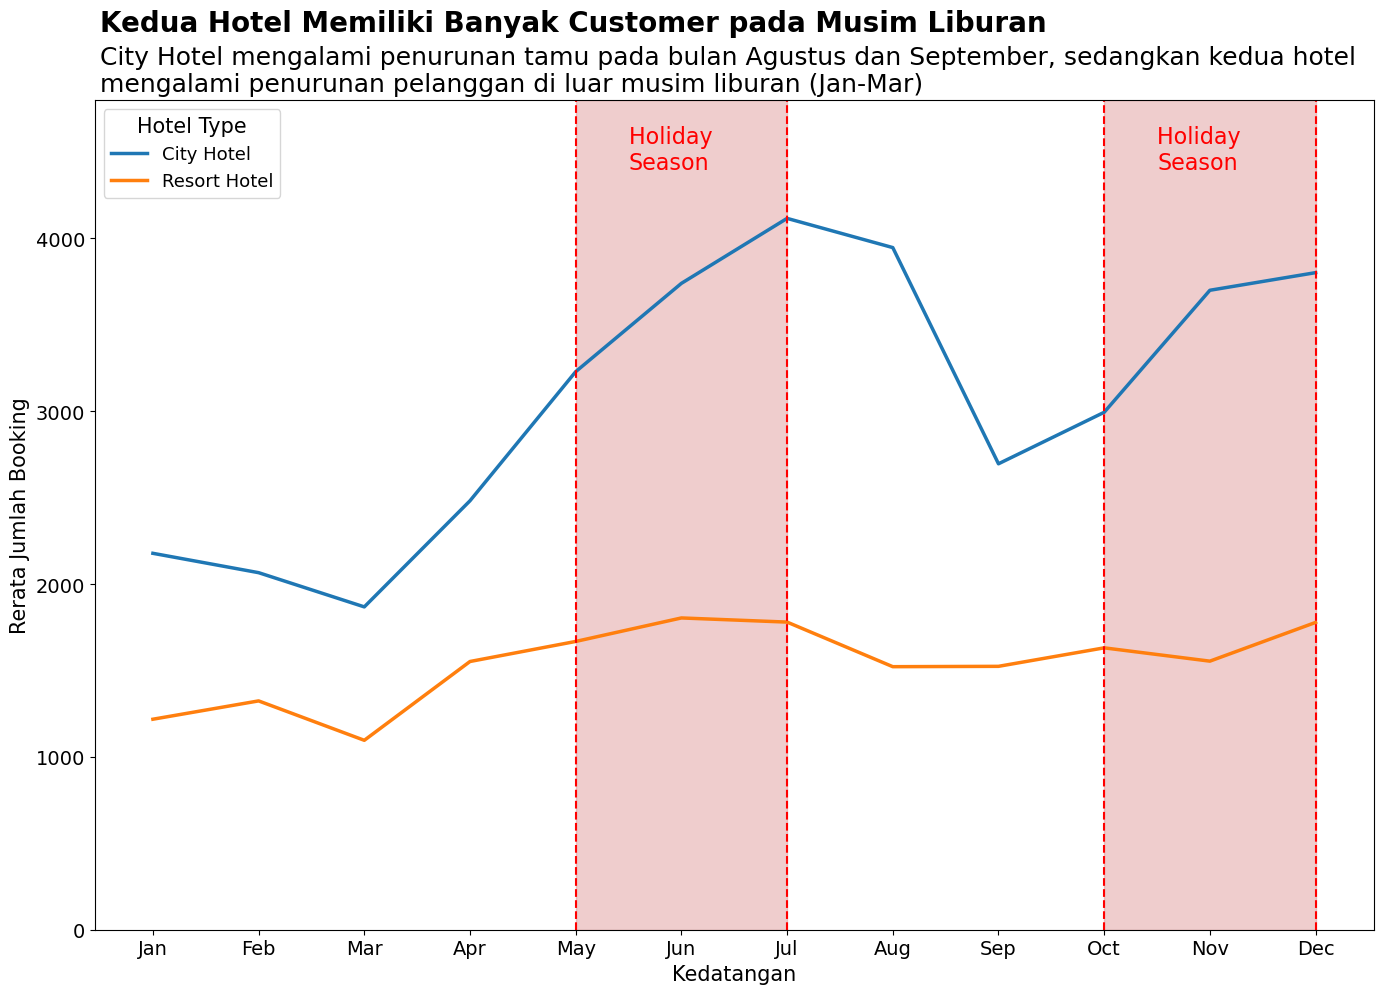

In [86]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', 
             size="hotel_type", sizes=(2.5, 2.5), data=df1_gr) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label

plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Kedatangan', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Rerata Jumlah Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Kedua Hotel Memiliki Banyak Customer pada Musim Liburan", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="City Hotel mengalami penurunan tamu pada bulan Agustus dan September, sedangkan kedua hotel \nmengalami penurunan pelanggan di luar musim liburan (Jan-Mar)", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.show()

## 2.5 Interpretasi Data

- **City Hotel**
Berdasarkan grafik jumlah pesanan **City Hotel** dapat dilihat bahwa rata-rata booking terendah ada pada Bulan Maret, sedangkan tertinggi terjadi pada Bulan Juli. Jumlah pesanan pada **City Hotel** meningkat signifikan hingga Bulan Juli, ini terjadi karena pada Bulan Mei hingga Juli merupakan musim liburan baik bagi pelajar maupun mahasiswa. Pada Bulan-bulan berikutnya terjadi penurunan kembali hingga Bulan September hingga Desember yang juga terjadi karena musim liburan dan mendekati Natal serta tahun baru.
- **Resort Hotel**
Berdasarkan grafik jumlah pesanan **Resort Hotel** dapat dilihat bahwa rata-rata booking terendah terjadi pada Bulan Maret, sedangkan tertinggi terjadi pada Bulan Juni. Jumlah peningkatan pesanan ini meningkat pada Bulan April hingga Juni yang dikarenakan musim liburan, lalu terjadi lagi penurunan pada Bulan Agustus - September dan kembali meningkat pada Bulan Oktober hingga Desember yang mana ini mulai memasuki musim liburan dan mendekati Natal dan Tahun Baru.

# 3. Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

In [28]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer,number_date_month
0,Resort Hotel,0,342,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,9.0,40.0,0,Personal,0.0,0,0,Check-Out,2.0,9
1,Resort Hotel,0,737,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,9.0,40.0,0,Personal,0.0,0,0,Check-Out,2.0,9
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,9.0,40.0,0,Personal,75.0,0,0,Check-Out,1.0,9
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,40.0,0,Personal,75.0,0,0,Check-Out,1.0,9
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,40.0,0,Personal,98.0,0,1,Check-Out,2.0,9


## 3.1 Membuat Kolom Baru Berisi Total Durasi Menginap

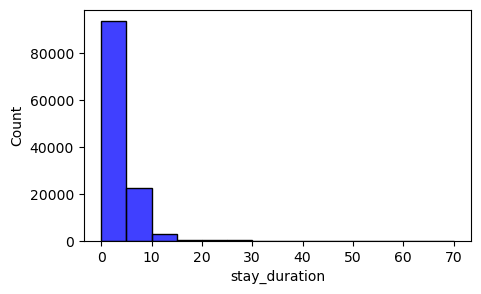

In [56]:
plt.figure(figsize=(5,3))
df1['stay_duration'] = df1['stays_in_weekend_nights'] + df1['stays_in_weekdays_nights']
sns.histplot(data=df1, x='stay_duration', binwidth=5, color="blue")
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa persebaran data terlihat right-skewed. Oleh karena itu dilakukan pengelompokkan untuk membuat persebarannya menjadi lebih merata. Pengelompokkan tersebut dilakukan pada tiap minggu dalam 1 Bulan

## 3.2 Mengelompokkan Nilai-nilai dari Tabel stay_duration

In [72]:
df1 = df1.drop('stay_group',axis=1)

In [84]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer,number_date_month,stay_duration,lead_time_group,stay_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,9.0,40.0,0,Personal,0.0,0,0,Check-Out,2.0,9,0,12 months,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,9.0,40.0,0,Personal,0.0,0,0,Check-Out,2.0,9,0,> 1 year,0


In [77]:
df1['stay_group'] = np.where(df1['stay_duration'] > 21, 21, 
                                       np.where(df1['stay_duration'] > 14, 15, df1['stay_duration']))

## 3.3 Tabel Agregat Jumlah Pesanan yang Dibatalkan Terhadap Durasi Menginap

In [78]:
df2 = df1.groupby(['hotel', 'is_canceled', 'stay_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2_pivot = df2.pivot_table(index=['hotel', 'stay_group'], columns='is_canceled', values='num_bookings').reset_index()
df2_pivot['pct_canceled'] = round(df2_pivot[1]*100.0/(df2_pivot[0]+df2_pivot[1]), 2)

In [79]:
df2.head(5)

,hotel,is_canceled,stay_group,num_bookings
0,City Hotel,0,0,308
1,City Hotel,0,1,9169
2,City Hotel,0,2,10992
3,City Hotel,0,3,11895
4,City Hotel,0,4,7704


In [80]:
df2_pivot.head(5)

is_canceled,hotel,stay_group,0,1,pct_canceled
0,City Hotel,0,308,23,6.95
1,City Hotel,1,9169,4103,30.91
2,City Hotel,2,10992,10434,48.70
3,City Hotel,3,11895,9486,44.37
4,City Hotel,4,7704,4853,38.65


## 3.4 Grafik Rasio Pembatalan Pesanan Terhadap Durasi Menginap

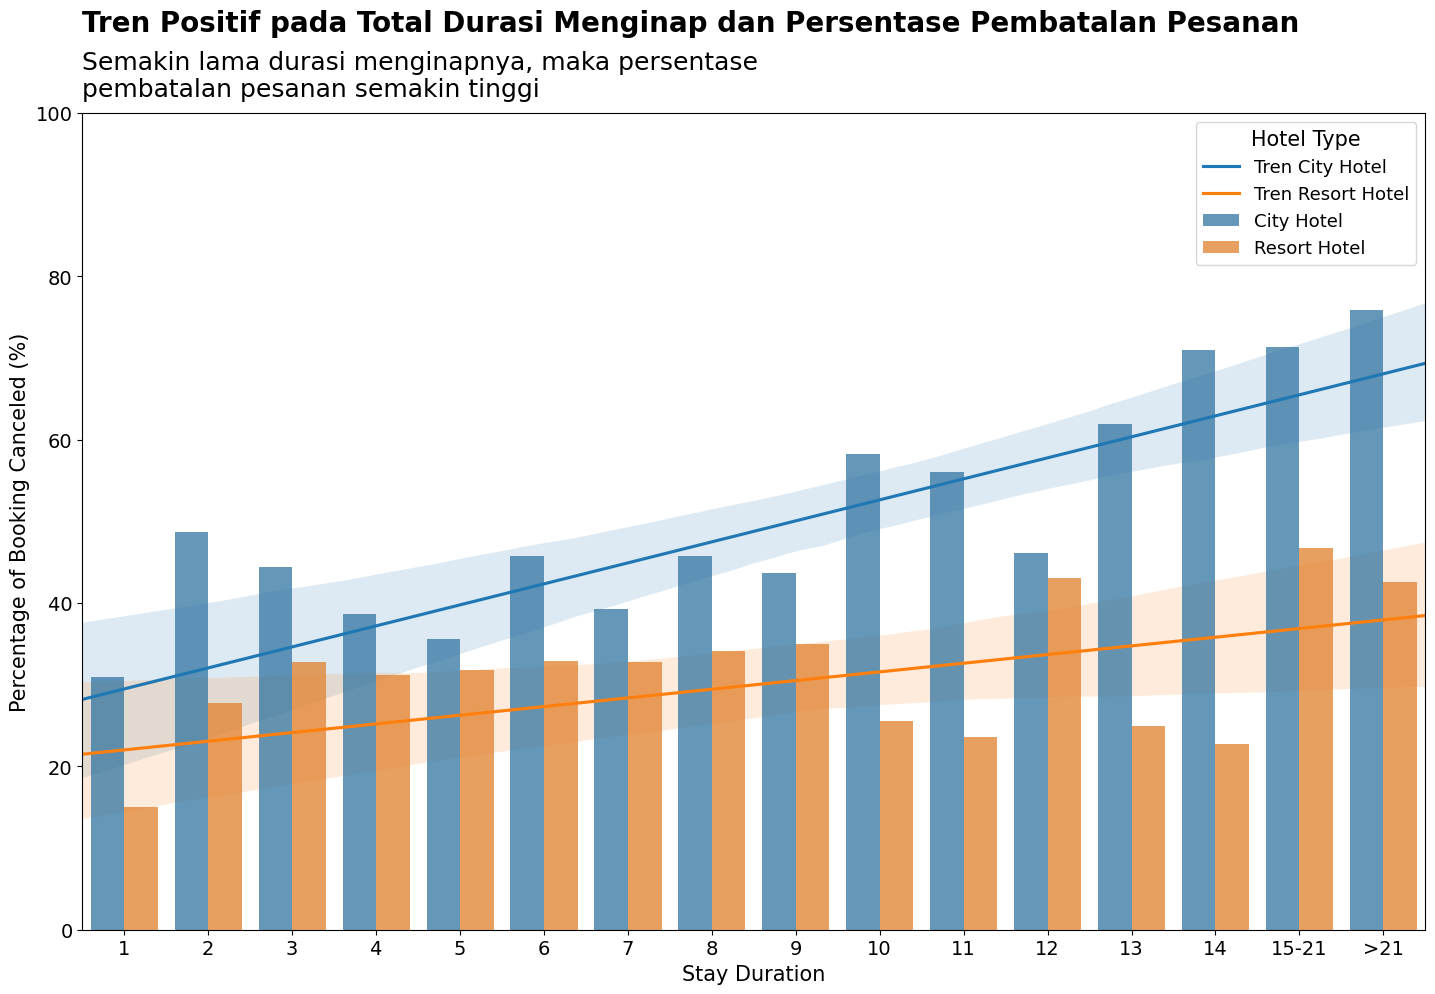

In [109]:
plt.figure(figsize=(15,10))
sns.regplot(x='stay_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'City Hotel'], scatter=False, label='Tren City Hotel')
sns.regplot(x='stay_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Tren Resort Hotel')
sns.barplot(x='stay_group', y='pct_canceled', hue='hotel', data=df2_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) 

plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) # mengatur customized-label pada x-axis
plt.xlabel('Stay Duration', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 16.5) # membatasi x axis

plt.text(x=0.5, y=110, s="Tren Positif pada Total Durasi Menginap dan Persentase Pembatalan Pesanan", 
         fontsize=20, fontweight='bold') 
plt.text(x=0.5, y=102, s="Semakin lama durasi menginapnya, maka persentase \npembatalan pesanan semakin tinggi", 
         fontsize=18) 

plt.tight_layout() 
plt.show()

Berdasarkan grafik diatas dapat dilihat bahwa terjadi peningkatan atau tren positif terhadap durasi menginap dan pembatalan pesanan. Hal ini menandakan bahwa semakin lama durasi menginap maka semakin tinggi juga pembatalan pesanan. Persentase pembatalan pesanan tertinggi terjadi pada durasi menginap yang lebih dari 1 bulan. Hal ini terjadi baik pada **City Hotel** dan **Resort Hotel**. Namun pada **Resort Hotel** pada durasi menginap 2 minggu terjadi pembatalan yang cukup sedikit.

# 4. Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate

## 4.1 Kategori Jarak Waktu Pemesanan

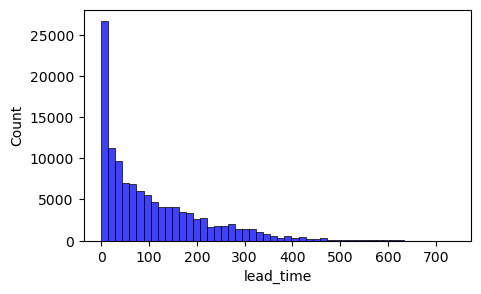

In [91]:
plt.figure(figsize=(5,3))
sns.histplot(data=df1, x="lead_time", bins=50, color="blue")
plt.show()

In [93]:
df1 = df1.drop('lead_time_group',axis=1)

In [95]:
# Mengkategorisasi kolom lead_time agar lebih sederhana
df1['lead_times'] = np.where(df1['lead_time'] > 400, 401, df1['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df1['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df1['lead_time_group'] = pd.cut(df1['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

## 4.2 Tabel Agregat Perbandingan Jumlah Pemesanan Hotel yang Dibatalkan Terhadap Jarak Waktu Pemesanan untuk Setiap Jenis Hotel

In [98]:
# melakukan agregasi data untuk menghitung jumlah pemesanan berdasarkan group lead_time yang sudah dibuat dan berdasarkan tipe hotel
df1_book = df1.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df1_pivot = df1_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df1_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df1_pivot['all_bookings'] = df1_pivot['not_canceled']+df1_pivot['canceled']
df1_pivot['pct_canceled'] = df1_pivot['canceled']*100.0/(df1_pivot['all_bookings']) 

In [99]:
df1_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18163,5199,23362,22.254088
1,City Hotel,30-60,7281,4608,11889,38.758516
2,City Hotel,60-90,5216,3692,8908,41.445891
3,City Hotel,90-120,3961,3486,7447,46.810796
4,City Hotel,120-150,3070,2543,5613,45.305541


## 4.3 Grafik Rasio Pembatalan Terhadap Rentang Waktu Pemesanan

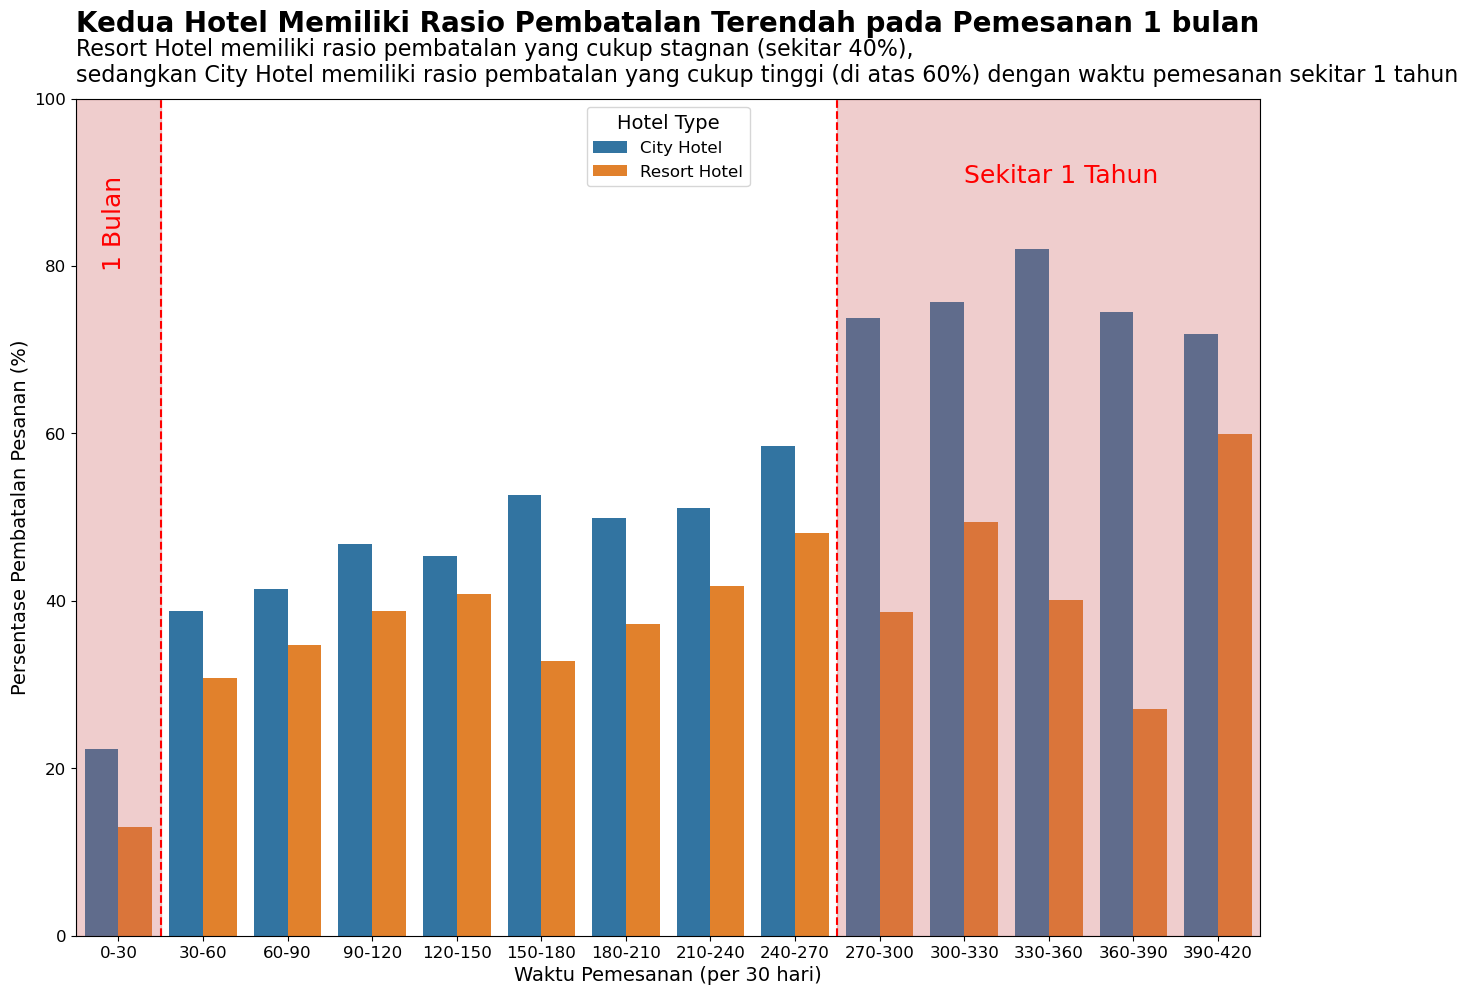

In [108]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df1_pivot) 
plt.tick_params(axis='both', which='major', labelsize=12) 

plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) 

plt.xlabel('Waktu Pemesanan (per 30 hari)', fontsize=14) 
plt.ylabel('Persentase Pembatalan Pesanan (%)', fontsize=14) 
plt.ylim(0, 100) 
plt.xlim(-0.5,13.5) 

plt.axvline(0.5, ls='--', color='red') 
plt.text(x=-0.2, y=80, s='1 Bulan', fontsize=18, color='red', rotation=90) 
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) 

plt.axvline(8.5, ls='--', color='red') 
plt.text(x=10, y=90, s='Sekitar 1 Tahun', fontsize=18, color='red') 
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) 

plt.text(x=-0.5, y=108, s="Kedua Hotel Memiliki Rasio Pembatalan Terendah pada Pemesanan 1 bulan", 
         fontsize=20, fontweight='bold') 
plt.text(x=-0.5, y=102, s='Resort Hotel memiliki rasio pembatalan yang cukup stagnan (sekitar 40%), \nsedangkan City Hotel memiliki rasio pembatalan yang cukup tinggi (di atas 60%) dengan waktu pemesanan sekitar 1 tahun', 
         fontsize=16) 
 
plt.tight_layout() 
plt.show()

Berdasarkan grafik diatas,dapat dilihat bahwa baik **City Hotel** dan **Resort Hotel** memiliki persentase pembatalan pesanan terendah pada jangka waktu pemesanan 1 bulan. Tren meningkat positif pada **City Hotel** yang berarti bahwa semakin tingginya waktu pemesanan (2 bulan hingga > 1 tahun) maka persentase pembatalan pesanan semakin tinggi. Sedangkan pada **Resort Hotel** cenderung meningkat dan menurun. Jangka waktu pemesanan di sekitaran 1 tahun cukup memiliki pembatalan pesanan yang tidak terlalu tinggi, ini kemungkinan dikarenakan customer ingin melakukan liburan pada **Resort Hotel** untuk *occasion* terterntu sehingga sudah dipesan jauh-jauh hari dan tidak dilakukan pembatalan.